# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 3 - Titanic data handling, Fourier transform

---


## Guidelines (read carefully before starting)


**Objectives**: acquire further practice with common libraries and algorithms (`numpy.fft`, `matplotlib`, `seaborn`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the `.zip` archive in a local folder (Computer -> Documents/Python/);
- unzip the archive `.zip`;
- rename the folder with the convention `lab3_Name1_Name2`;
- duplicate the notebook file and rename it `lab3_Name1_Name2.ipynb`;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab3` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab3 --file=requirement.txt --channel conda-forge
    conda activate lab3
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab3
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab3`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy.random`: [documentation](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) 

[2] `numpy.fft`: [documentation](https://numpy.org/doc/stable/reference/routines.fft.html?highlight=fft#module-numpy.fft)

[3] `seaborn`: [tutorial/documentation](https://seaborn.pydata.org/tutorial.html#)

[4] `pandas`: [documentation](https://pandas.pydata.org/docs/reference/index.html)

[5] `matplotlib`: [documentation](https://matplotlib.org/contents.html)


## <a name="content">Contents</a>
- [Exercise 1: Titanic data handling](#ex1)
- [Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution](#ex2)
---

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Titanic data handling</a> [(&#8593;)](#content)

Welcome to this data cleaning exercise with the Titanic dataset. Data cleaning is a crucial step in data analysis, involving tasks like handling missing values, adjusting data types, and preparing data for analysis.

In this exercise, we'll use Python and Pandas to clean the Titanic dataset, which contains passenger information. The goal is to get the data ready for analysis by addressing data quality issues.

You'll go through tasks like identifying and handling missing values, selecting relevant columns, converting data types, handling categorical data, and performing basic data exploration using Matplotlib and seaborn.

Let's begin by importing the dataset and taking a first look at the data.

### 1. Data import

Download the Titanic dataset from [this link](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) file into a Pandas DataFrame.
Name the DataFrame descriptively.

Your answers(s)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_df = pd.read_csv("https://github.com/datasciencedojo/datasets/raw/refs/heads/master/titanic.csv")

Initial Data Overview:

- Display the first five rows of the DataFrame using `head()`.
- Check for missing values in each column, display the number of missing values in each column as a percentage.
- Inspect data types using dtypes, and convert data types where needed.
- Identify categorical columns, and encode them using pd.get_dummies().

Handling Missing Values:
Develop a strategy to address missing values, considering alternatives like imputation or removal.
- Hint: Look into the `dropna()` and `fillna()` methods depending on your strategy.

Your answers(s)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
First, we will have a look at the first five rows of the dataset and its shape
</div>

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.shape

(891, 12)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
It can be noticed that the <b>PassengerId</b> column does not carry any useful information, so it can be removed
</div>

In [6]:
titanic_df.drop("PassengerId", axis=1, inplace=True)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The <b>Name</b> and <b>Ticket</b> columns are also useless for training the model, so they can be removed as well
</div>

In [7]:
titanic_df.drop(["Name", "Ticket"], axis=1, inplace=True)

Let's see how many missing values and in which columns we have

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Let's see how many missing values and in which columns we have
</div>

In [8]:
missing_counts = titanic_df.isna().sum()
missing_percent = missing_counts / len(titanic_df) * 100

missing_table = pd.DataFrame({
    "Missing values": missing_counts,
    "Percentage": missing_percent
})

missing_table

,Missing values,Percentage
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377
Embarked,2,0.224467


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
77% of <b>Cabin</b> values are NaNs, so it's reasonable to remove this column
</div>

In [9]:
titanic_df.drop("Cabin", axis=1, inplace=True)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
There are only 2 out of 891 missing values in the <b>Embarked</b> column, so we can remove these rows
</div>

In [10]:
titanic_df.dropna(subset="Embarked", inplace=True)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
We have around 20% missing values in the <b>Age</b> column, so it does not seem reasonable to remove either the rows containing NaNs or the entire column.
    Instead, we will replace the missing values with the average age calculated separately for each gender
</div>

In [11]:
titanic_df.Age = titanic_df.Age.fillna(
    titanic_df.groupby("Sex").Age.transform("mean")
)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Now, the dataset should not cantain any NaN values
</div>

In [12]:
assert titanic_df.isna().sum().sum() == 0

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Let's inspect data types using dtypes and convert data types where needed
</div>

In [13]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
titanic_df.Age = titanic_df.Age.astype(int)
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Let's see how the data looks now
</div>

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [16]:
titanic_df.nunique()

Survived      2
Pclass        3
Sex           2
Age          71
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Column <b>Sex</b> is binary, but we want to use 0 and 1 instead of female and male respectively
</div>

In [17]:
titanic_df.Sex = (titanic_df.Sex == "male").astype(int)

In [18]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Now, we can identify nonbinary categorical columns and encode them
</div>

In [19]:
# Survived & Sex are already binary
# SibSp & Parch are not categorical since they mean the number of some relatives on board
categorical_features = ["Pclass", "Embarked"]

In [20]:
titanic_df = pd.get_dummies(
    titanic_df, 
    columns=categorical_features, 
    prefix=categorical_features, 
    dtype=int
)

In [21]:
titanic_df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Insights:

Look into how certain variables influence other vairables in the dataset and try to find some interesting insights.
- Hint: You can inverstigate `groupby()` and `agg()` to aggregate data, as well as `value_counts` or `pivot`..


Your answers(s)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Sex and survival
</div>

In [22]:
titanic_df.groupby("Sex")["Survived"].mean()

Sex
0    0.740385
1    0.188908
Name: Survived, dtype: float64

<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px; background-color:#f5f5f5; font-family: monospace;">
Women survived much more often than men (74% vs. 19%)
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Ticket class and survival
</div>

In [23]:
for i in [1, 2, 3]:
    print(titanic_df.groupby(f"Pclass_{i}")["Survived"].mean())
    print()

Pclass_1
0    0.305185
1    0.626168
Name: Survived, dtype: float64

Pclass_2
0    0.358865
1    0.472826
Name: Survived, dtype: float64

Pclass_3
0    0.555276
1    0.242363
Name: Survived, dtype: float64



<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px; background-color:#f5f5f5; font-family: monospace;">
1st class: ~63%<br>
2nd class: ~47%<br>
3rd class: ~24%
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Sex & ticket class and survival
</div>

In [24]:
for i in range(1, 4):
    print(titanic_df.groupby(["Sex", f"Pclass_{i}"])["Survived"].mean())
    print()

Sex  Pclass_1
0    0           0.645455
     1           0.967391
1    0           0.140659
     1           0.368852
Name: Survived, dtype: float64

Sex  Pclass_2
0    0           0.682203
     1           0.921053
1    0           0.196162
     1           0.157407
Name: Survived, dtype: float64

Sex  Pclass_3
0    0           0.946429
     1           0.500000
1    0           0.269565
     1           0.135447
Name: Survived, dtype: float64



<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px; background-color:#f5f5f5; font-family: monospace;">
Women, 1st class: ~97%<br>
Women, 2nd class: ~92%<br>
Men, 2nd class: ~16%<br>
Men, 3rd class: ~13%
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Age group and survival
</div>

In [25]:
bins = [0, 12, 29, 55, 100]
labels = ["Child", "Young", "Adult", "Senior"]
titanic_df["AgeGroup"] = pd.cut(titanic_df["Age"], bins=bins, labels=labels, right=True)
print(titanic_df.groupby("AgeGroup", observed=False)["Survived"].mean())
titanic_df.drop("AgeGroup", axis=1, inplace=True)

AgeGroup
Child     0.532258
Young     0.413043
Adult     0.330918
Senior    0.289474
Name: Survived, dtype: float64


<div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px; background-color:#f5f5f5; font-family: monospace;">
The older a passenger, the lower the chance of survival
</div>

Visualisation

Choose appropriate plotting techniques for visualizing columns of your choosing display them.
Generate at least 4 graphs, complete with axes, titles, and legends. Feel free to add error bars, confidence intervals, differences in hue, size, and shape if appropriate.
- Hint: Pandas has a built-in plotting library that is a wrapper around matplotlib. You can learn more [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

Your answers(s)

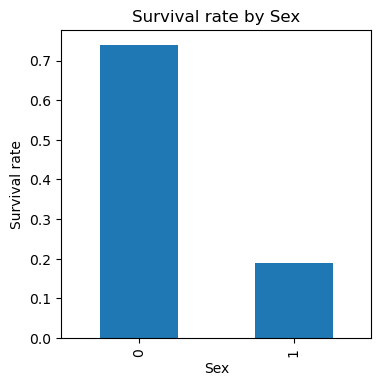

In [26]:
survival_by_sex = titanic_df.groupby("Sex")["Survived"].mean()
survival_by_sex.plot(kind="bar", figsize=(4,4))
plt.title("Survival rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.show()

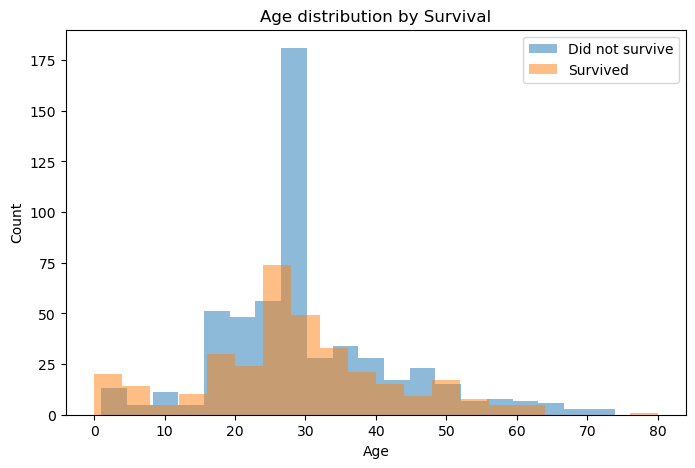

In [27]:
ax = titanic_df[titanic_df.Survived == 0]["Age"].plot(kind="hist", alpha=0.5, bins=20, label="Did not survive", figsize=(8,5))
titanic_df[titanic_df.Survived == 1]["Age"].plot(kind="hist", alpha=0.5, bins=20, label="Survived", ax=ax)
plt.title("Age distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

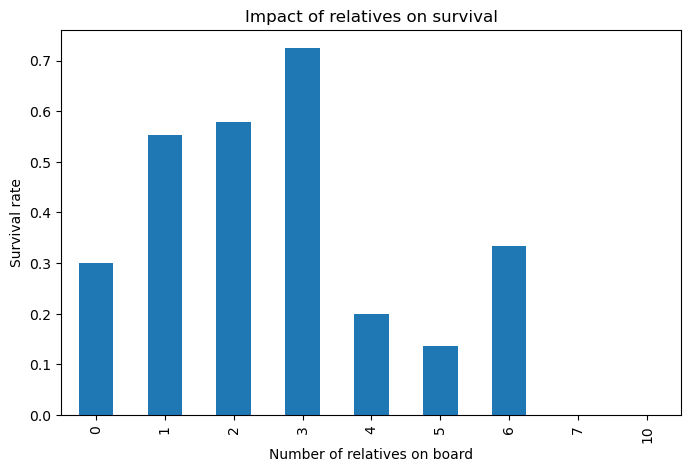

In [28]:
titanic_df["Relatives"] = titanic_df["SibSp"] + titanic_df["Parch"]
survival_by_relatives = titanic_df.groupby("Relatives")["Survived"].mean()

survival_by_relatives.plot(
    kind="bar",
    figsize=(8, 5),
    ylabel="Survival rate",
    xlabel="Number of relatives on board",
    title="Impact of relatives on survival"
)

plt.show()
titanic_df.drop("Relatives", axis=1, inplace=True)

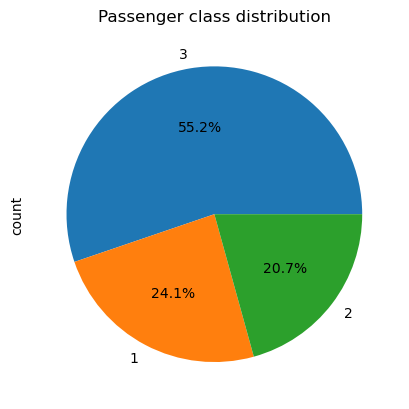

In [29]:
titanic_df["Pclass"] = (
    titanic_df["Pclass_1"] * 1 +
    titanic_df["Pclass_2"] * 2 +
    titanic_df["Pclass_3"] * 3
)

titanic_df["Pclass"].value_counts().plot(
    kind="pie",
    autopct="%.1f%%",
    title="Passenger class distribution"
)

plt.show()
titanic_df.drop("Pclass", axis=1, inplace=True)

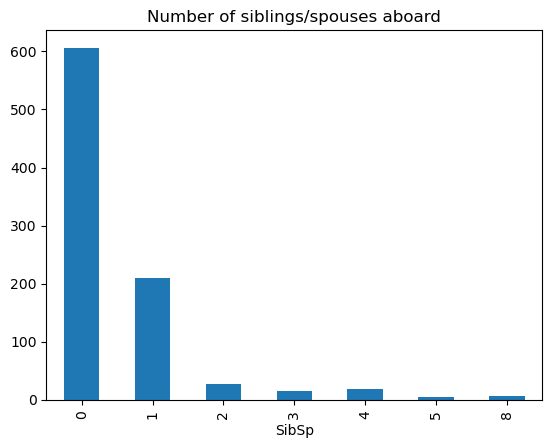

In [30]:
titanic_df["SibSp"].value_counts().sort_index().plot(
    kind="bar",
    title="Number of siblings/spouses aboard"
)
plt.show()

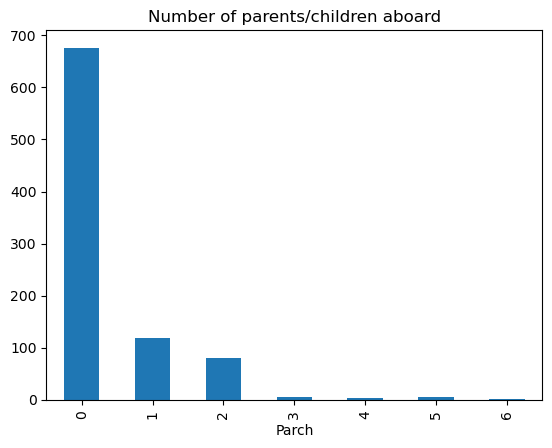

In [31]:
titanic_df["Parch"].value_counts().sort_index().plot(
    kind="bar", 
    title="Number of parents/children aboard"
)
plt.show()

**Bonus**

Write a simple classifier to predict wether a passenger survives or not. You can use the `sklearn` library to do so.

Your answers(s)

In [32]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [33]:
X, y = titanic_df.drop("Survived", axis=1), titanic_df.Survived

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
kf = KFold(n_splits=5)
accuracies = []
f1_scores = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)
    f1 = f1_score(y_test_fold, y_pred)
    f1_scores.append(f1)
    
    print(f"    accuracy = {accuracy:.3f}")
    print(f"    f1       = {f1:.3f}")

print()
print(f"Average accuracy over all folds: {sum(accuracies) / len(accuracies):.3f}")
print(f"Average F1 score over all folds: {sum(f1_scores) / len(f1_scores):.3f}")

Fold 0:
    accuracy = 0.797
    f1       = 0.718
Fold 1:
    accuracy = 0.810
    f1       = 0.765
Fold 2:
    accuracy = 0.824
    f1       = 0.725
Fold 3:
    accuracy = 0.824
    f1       = 0.766
Fold 4:
    accuracy = 0.817
    f1       = 0.729

Average accuracy over all folds: 0.814
Average F1 score over all folds: 0.741


In [36]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test set accuracy: {test_accuracy:.3f}")
print(f"Test set F1-score: {test_f1:.3f}")

Test set accuracy: 0.826
Test set F1-score: 0.770


---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a> [(&#8593;)](#content)

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

Your answers(s)

In [37]:
from PIL import Image
import numpy as np

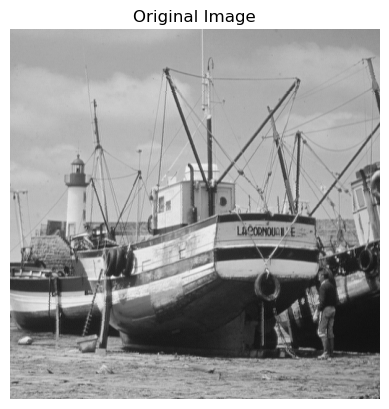

In [38]:
img = Image.open("img/boat.png")
X = np.array(img)

plt.imshow(X, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

Your answers(s)

In [39]:
# Compute 2D Fourier transform
F = np.fft.fft2(X)

In [40]:
# Compute the spectrum of the image
spectrum = np.abs(F) ** 2

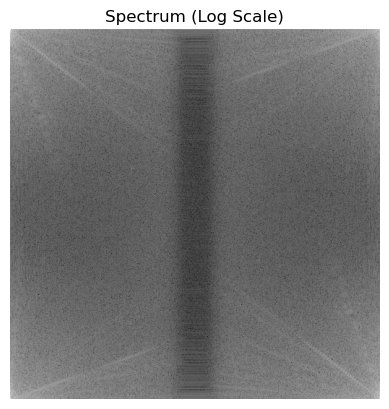

In [41]:
# Display in logarithmic scale
assert (np.array(spectrum) > 0).all() # Avoid log(0)

plt.imshow(np.log(spectrum), cmap="gray")
plt.title("Spectrum (Log Scale)")
plt.axis("off")
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The null frequency is usually the largest value in the Fourier spectrum, because it represents the average brightness of the image
</div>

In [42]:
# Find the coordinates of null frequency
coords = np.unravel_index(np.argmax(spectrum), spectrum.shape)
print("The null frequency is located at:", coords)

The null frequency is located at: (np.int64(0), np.int64(0))


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The null frequency is located at the top-left corner (0, 0) of the spectrum
</div>

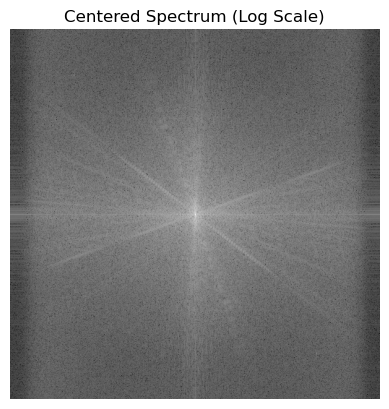

In [43]:
# Shift the spectrum to center the null frequency
spectrum_shifted = np.fft.fftshift(spectrum)
assert (np.array(spectrum_shifted) > 0).all() # Avoid log(0)

plt.imshow(np.log(spectrum_shifted), cmap="gray")
plt.title("Centered Spectrum (Log Scale)")
plt.axis("off")
plt.show()

In [44]:
# Find the coordinates of null frequency
coords = np.unravel_index(np.argmax(spectrum_shifted), spectrum_shifted.shape)
print(f"The null frequency is now located at: {coords}, while image size is {spectrum_shifted.shape}")

The null frequency is now located at: (np.int64(256), np.int64(256)), while image size is (512, 512)


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
The null frequency is now located at the center of the image
</div>

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

Your answers(s)

In [45]:
def ideal_lowpass_filter(X: np.ndarray, fc: tuple[int, int]) -> np.ndarray:
    """
    Apply an ideal low-pass filter in the Fourier domain to a grayscale image.
    
    Parameters
    ----------
    X : np.ndarray
        2D numpy array of shape (M, N), representing the grayscale image.
    fc : tuple of int
        (fc_y, fc_x), cutoff half-widths along the vertical (y) and horizontal (x) axes.
        - The filter preserves frequencies in the rectangular region:
          [center_y - fc_y : center_y + fc_y] × [center_x - fc_x : center_x + fc_x]
        - This means the actual size of the preserved low-frequency region is
          (2 * fc_y) × (2 * fc_x).
    
    Example
    -------
    >>> import numpy as np
    >>> from PIL import Image
    >>> import matplotlib.pyplot as plt
    >>> img = Image.open("img/boat.png").convert("L")
    >>> X = np.array(img)
    >>> # Keep a 100x100 block of low frequencies (because 2*50 × 2*50)
    >>> filtered = ideal_lowpass_filter(X, (50, 50))
    >>> plt.imshow(filtered, cmap="gray")
    >>> plt.title("Filtered Image")
    >>> plt.show()
    """
    # Check that X is a 2D array
    if X.ndim != 2:
        raise AssertionError("Input X must be a 2D array (matrix).")

    # Check that fc is (int, int)
    if type(fc) != tuple or len(fc) != 2:
        raise AssertionError("Input fc must be a tuple[int, int].")
    
    M, N = X.shape
    fc_y, fc_x = fc
    
    # Compute Fourier transform
    F = np.fft.fft2(X)
    F_shifted = np.fft.fftshift(F)
    
    # Create mask
    # The further away from the center, the higher the frequency. So we don’t compute the frequency values explicitly
    # Instead, we approximate this by preserving a central region of coefficients
    mask = np.zeros((M, N), dtype=np.float32)
    center_y, center_x = M // 2, N // 2
    mask[center_y - fc_y:center_y + fc_y,
         center_x - fc_x:center_x + fc_x] = 1
    
    # Apply filter
    F_filtered = F_shifted * mask
    
    # Inverse FFT to reconstruct image
    F_ishift = np.fft.ifftshift(F_filtered)
    filtered_image = np.fft.ifft2(F_ishift)
    
    return np.real(filtered_image)

In [46]:
def test_ILF_output_shape():
    """Check that output has the correct shape and format."""
    X = np.random.randn(300, 300)
    filtered_img = ideal_lowpass_filter(X, (25, 35))
    
    assert isinstance(filtered_img, np.ndarray)
    assert filtered_img.shape == ((300, 300))

In [47]:
def test_ILF_invalid_dim():
    """Check that the function raises an error for non-2D input."""
    X = np.random.randn(30, 30, 30)
    try:
        ideal_lowpass_filter(X, (10, 10))
        raise AssertionError("ideal_lowpass_filter did not raise an error for 3D input")
    except AssertionError:
        pass  # Correct behavior

In [48]:
def test_ILF_invalid_fc():
    """Check that the function raises an error for incorrect fc input."""
    X = np.random.randn(300, 300)
    try:
        ideal_lowpass_filter(X, 50)
        raise AssertionError("ideal_lowpass_filter did not raise an error for incorrect fc input")
    except AssertionError:
        pass  # Correct behavior

In [49]:
test_ILF_output_shape()
test_ILF_invalid_dim()
test_ILF_invalid_fc()

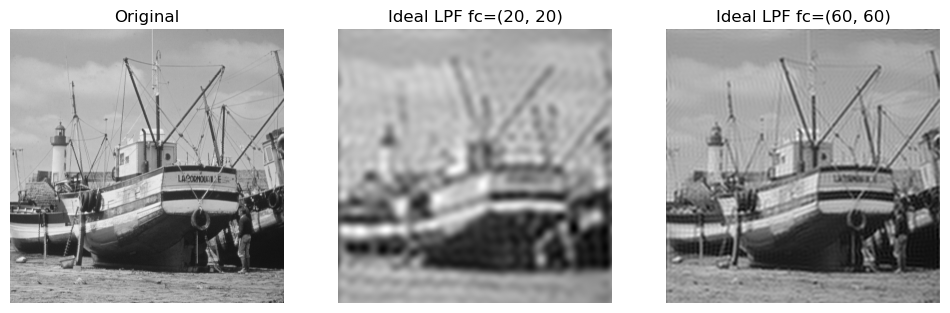

In [50]:
fc1 = (20, 20)
fc2 = (60, 60)

img_low1 = ideal_lowpass_filter(X, fc1)
img_low2 = ideal_lowpass_filter(X, fc2)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(X, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_low1, cmap="gray")
plt.title(f"Ideal LPF fc={fc1}")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_low2, cmap="gray")
plt.title(f"Ideal LPF fc={fc2}")
plt.axis("off")

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
As cutoff increases more details (edges, textures) are retained
</div>

**Bonus**


4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \bigg( \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \bigg) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform and $P_1^*$ is a cropping operator (adjoint of $P_1$). 

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

Your answers(s)

In [51]:
from scipy.signal import windows

In [52]:
# Parameters
M1 = X.shape[0]
N1 = X.shape[1]
M2 = N2 = 10
sigma_x = sigma_y = 10

In [53]:
# Create 1D Gaussian windows
wy = windows.gaussian(M2, std=sigma_y)
wx = windows.gaussian(N2, std=sigma_x)

In [54]:
# Outer product to form 2D Gaussian kernel H
H = np.outer(wy, wx)

In [55]:
# Sizes for padding
M = M1 + M2 - 1
N = N1 + N2 - 1

In [56]:
# Zero-padding operators P1 and P2
def pad_to_shape(A, shape):
    """Pad array A with zeros to match shape."""
    padded = np.zeros(shape)
    padded[:A.shape[0], :A.shape[1]] = A
    return padded

X_pad = pad_to_shape(X, (M, N))
H_pad = pad_to_shape(H, (M, N))

In [57]:
# FFT-based convolution (discrete convolution theorem)
F_X = np.fft.rfft2(X_pad)
F_H = np.fft.rfft2(H_pad)
conv_freq = F_X * F_H
conv_result = np.fft.irfft2(conv_freq, s=(M, N))

In [58]:
# Cropping to original size (P1*)
conv_cropped = conv_result[:M1, :N1]

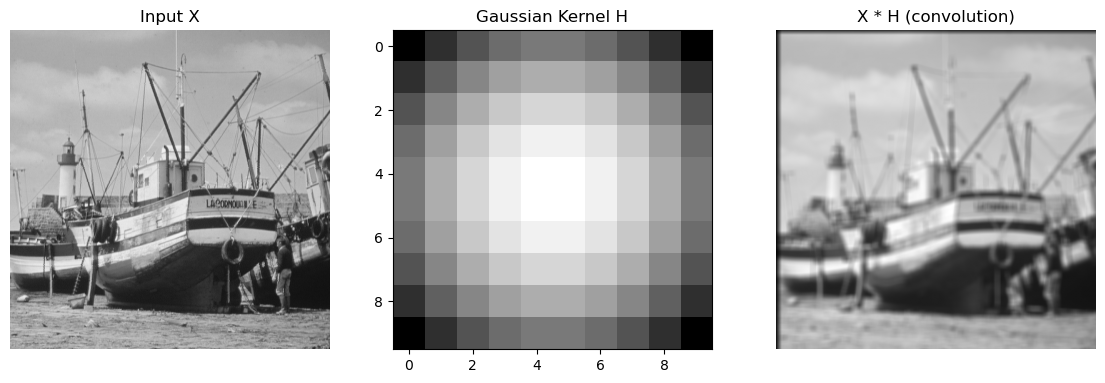

In [59]:
# Display results
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.title("Input X")
plt.imshow(X, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gaussian Kernel H")
plt.imshow(H, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("X * H (convolution)")
plt.imshow(conv_cropped, cmap="gray")
plt.axis("off")

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
We can observe that the output is a blurred (smoothed) version of the original image
</div>